Velarion - Exploratory Data Analysis
---

## <font color='#b0aeae'>**Índice**</font>

1. Descripción del Notebook
2. Configuraciónes
   * Importación de librerías
   * Paths
   * Paleta de Colores del Proyecto
   * Funciones
3. Extracción de datos
   * Clientes
   * Transacciones
   * Interacciones con la App
   * IAPCs
4. Exploratory Data Analysis (EDA)

# <font color='#315aa0'>**Cofiguraciones**</font>

## <font color='#c37171'>**Importación de librerías**</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json

import os
from typing import Callable, List, Dict, Tuple
from pathlib import Path

from IPython.display import clear_output
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## <font color='#c37171'>**Paths**</font>

In [2]:
# Obtiene el path actual
PROJECT_PATH = os.getcwd()

src = Path('src')
DATA_PATH = PROJECT_PATH / src

img = Path('img')
IMG_PATH = PROJECT_PATH / img

models = Path('models')
MODELS_PATH = PROJECT_PATH / models

reports = Path('reports')
REPORTS_PATH = PROJECT_PATH / reports

dirs = [DATA_PATH, IMG_PATH, MODELS_PATH, REPORTS_PATH]


for directory in dirs:
    if not directory.exists():
        directory.mkdir(parents=True)
        print(f'Directorio creado:\n{directory}\n')
    else:
        print(f'El directorio ya existe:\n{directory}\n')

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\src

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\img

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\models

El directorio ya existe:
C:\Users\Ignacio\JupyterScripts\Fintech_NC\reports



## <font color='#c37171'>**Paleta de Colores del Proyecto**</font>

**Bordós / Rojos**

<span style="display:inline-block; width:20px; height:20px; background:#620c0c; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#8b1f1f; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#a14b4b; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#c37171; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#e29c9c; margin-right:5px;"></span>

**Grises / Neutros**

<span style="display:inline-block; width:20px; height:20px; background:#5a5858; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#8c8a8a; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#b0aeae; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#d3d1d1; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#eae7e6; margin-right:5px;"></span>

**Azules**

<span style="display:inline-block; width:20px; height:20px; background:#0d1b3d; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#152a55; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#1e3a6c; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#274a84; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#315aa0; margin-right:5px;"></span>

**Cremas / Mostazas**

<span style="display:inline-block; width:20px; height:20px; background:#FCB53B; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDB860; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDC584; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDD2A9; margin-right:5px;"></span> 
<span style="display:inline-block; width:20px; height:20px; background:#FDE0CE; margin-right:5px;"></span>

In [3]:
BORDO_1, BORDO_2, BORDO_3, BORDO_4, BORDO_5 = '#620c0c', '#8b1f1f', '#a14b4b', '#c37171', '#e29c9c' 
GRIS_1, GRIS_2, GRIS_3, GRIS_4, GRIS_5 = '#5a5858', '#8c8a8a', '#b0aeae', '#d3d1d1', '#eae7e6' 
AZUL_1, AZUL_2, AZUL_3, AZUL_4, AZUL_5 = '#0d1b3d', '#152a55', '#1e3a6c', '#274a84', '#315aa0' 
CREMA_1, CREMA_2, CREMA_3, CREMA_4, CREMA_5 = '#FCB53B', '#FDB860', '#FDC584', '#FDD2A9', '#FDE0CE'

## <font color='#c37171'>**Funciones**</font>

In [43]:
exited_colors = [GRIS_3, BORDO_2]

In [5]:
def boxplot_exited(df: pd.DataFrame,
                  ycol: str,
                  ylabel: str=None,
                  path='.'):
    """    
    Genera y guarda un diagrama de caja (boxplot) con la distribución de una característica numérica ('ycol')
    diferenciada según la condición de abandono ('Exited').
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame que contiene los datos para graficar. Debe incluir las columnas 'Exited' y <'ycol'>.
    ycol : str
        Nombre de la columna numérica a visualizar.
    ylabel : str, opcional
        Etiqueta personalizada para el eje Y. Si no se especifica, se usará el nombre de 'ycol'.
    --------------------------------------------------------------------------------------------------
    Guardado
    --------
    Guarda el gráfico como imagen PNG en la ruta './<path>/' bajo el nombre 'boxplot_Exited_<ycol>.png'. 
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    fig: matplotlib.figure.Figure
        Objeto Figure de Matplotlib con el gráfico generado.
    """

    if ylabel is None:
        ylabel = ycol
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    ax = sns.boxplot(data=df, x='Exited', y=ycol, hue='Exited', palette=exited_colors)
    plt.title(f'Distribución {ycol} según Exited', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Exited', fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(fontsize=13)
    plt.grid(True)
    
    fig.savefig(path/f'boxplot_Exited_{ycol}.png',
                transparent=False,
                dpi=300,
                bbox_inches='tight')
    plt.show()
    return fig

In [50]:
def histograma_exited(df, 
                     xcol, 
                     xlabel: str=None,
                     path: Path='.'):
    """
    Genera y guarda un histograma doble con la distribución de una variable numérica ('xcol'),
    diferenciada por la condición de abandono ('Exited' = 1 y 0).
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame que contiene los datos a graficar. Debe incluir la columna 'Exited' y la columna numérica <'xcol'>.
    xcol : str
        Nombre de la columna numérica a visualizar.
    xlabel : str, opcional
        Etiqueta personalizada para el eje X. Si no se especifica, se usará el nombre de 'xcol'.
    --------------------------------------------------------------------------------------------------
    Guardado
    --------
    Guarda el gráfico como imagen PNG en la ruta './<path>/' bajo el nombre 'hist_Churn_<xcol>.png'.
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    fig : matplotlib.figure.Figure
        Objeto Figure de Matplotlib con los gráficos generados.
    """

    if xlabel is None:
        xlabel = xcol
        
    fig, axes = plt.subplots(2,1, figsize=(8,6))

    sns.histplot(data=df[df['Exited'] == 0], x=xcol, bins=30, color=exited_colors[0], kde=True, ax=axes[0])
    axes[0].set_title("Exited = 0", fontsize=15, fontweight='bold', loc='left', color=GRIS_2)
    axes[0].set_xlabel(xlabel, fontsize=13)
    axes[0].set_ylabel('Frecuencia', fontsize=13)
    
    sns.histplot(data=df[df['Exited'] == 1], x=xcol, bins=30,  color=exited_colors[1], kde=True, ax=axes[1])
    axes[1].set_title("Exited = 1", fontsize=15, fontweight='bold', loc='left', color=BORDO_3)
    axes[1].set_xlabel(xlabel, fontsize=13)
    axes[1].set_ylabel('Frecuencia', fontsize=13)

    # Ajuste de los límites de los ejes
    ymax1 = axes[0].get_ylim()[1]
    ymax2 = axes[1].get_ylim()[1]

    ymax = max(ymax1, ymax2)

    axes[0].set_ylim(0, ymax)
    axes[1].set_ylim(0, ymax)

    # Configuraciones

    sns.despine()
    plt.suptitle(f'Distribución {xlabel} según Exited', fontsize=18, fontweight='bold', y=1.01)
    plt.subplots_adjust(hspace=2)
    plt.tight_layout()
    
    fig.savefig(f'{path}/hist_Extied_{xcol}.png',
                    transparent=False,
                    dpi=300,
                    bbox_inches='tight')
    
    plt.show()
    return fig


In [7]:
def bar_exited(df: pd.DataFrame,
              xcol: str,
              ycol: str='count',
              hue_col: str='Exited',
              figsize: Tuple=(6,4),
              xlabel: str=None,
              ylabel: str='Customer Count',
              rotation: float=None,
              path: Path='.'):
    
    """
    Genera y guarda un gráfico de barras agrupadas para comparar las clases de una variable categórica ('xcol'),
    diferenciadas según la condición de abandono ('Exited'), utilizando la frecuencia u otra métrica como altura.
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame que contiene los datos a graficar. Debe incluir la columna 'Exited' y la columna categórica <'xcol'>.
    xcol : str
        Columna categórica que se representa en el eje X.
    ycol : str, opcional
        Columna numérica para el eje Y. (Por defecto: 'count').
    hue_col : str, opcional
        Columna utilizada para agrupar los datos. (Por defecto: 'Exited').
    figsize : Tuple, opcional
        Tamaño de la figura en pulgadas (ancho, alto). (Por defecto: (6, 4)).
    xlabel : str, opcional
        Etiqueta del eje X. Si no se especifica, se usará el nombre de 'xcol'.
    ylabel : str, opcional
        Etiqueta del eje Y. (Por defecto: 'Customer Count').
    --------------------------------------------------------------------------------------------------
    Guardado
    --------
    Guarda el gráfico como imagen PNG en la ruta './<path>/' bajo el nombre 'bar_Churn_<xcol>.png'.
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    fig : matplotlib.figure.Figure
        Objeto Figure de Matplotlib con el gráfico de barras generado.
    """

    df_counts = pd.DataFrame(df_clients.groupby([xcol, hue_col])[xcol].value_counts()).reset_index()


    fig, ax = plt.subplots(figsize=figsize)
    
        
    ax = sns.barplot(data=df_counts, x=xcol, y=ycol, hue=hue_col, palette=exited_colors)
    ax.set_title(f'Exited según {xcol}', fontsize=18, fontweight='bold', pad=20)
    if xlabel is None:
        ax.set_xlabel('')
    else:
        ax.set_xlabel(xcol, fontsize=15)
        
    ax.set_ylabel(ylabel, fontsize=15)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', labelsize=12, labelrotation=rotation)
    for bar in ax.patches:
        height = bar.get_height()
        if height == 0:
            continue
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, 
                    height + 30,
                    f'{height:.0f}',
                    ha='center')
            
    sns.despine()


    fig.savefig(path/f'bar_Exited_{xcol}.png',
                transparent=False,
                dpi=300,
                bbox_inches='tight')

    plt.show()
    return fig


In [8]:
def pivot_and_exited_rate(df: pd.DataFrame, 
                          index_col: str):
    """
    Genera una tabla resumen con la tasa de abandono ('Exited rate') por clases de una variable categórica.

    Transforma un DataFrame con las columnas 'Exited' y 'count' en una tabla dinámica donde cada fila
    representa una categoría de 'index_col', con columnas separadas para cada valor de 'Exited'.
    Calcula la tasa de abandono y ordena los resultados en orden descendente.
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame con las columnas 'Exited' y 'count', que además contiene la variable categórica indicada
        en 'index_col'.
    index_col : str
        Nombre de la columna categórica que se utiliza como índice.
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    df : pd.DataFrame
        DataFrame con las columnas:
        - 'index_col': variable categórica evaluada
        - 'No Exited': cantidad de clientes que no cancelaron sus servicios
        - 'Exited': cantidad de clientes que cancelaron sus servicios
        - 'Exit Rate (%)': tasa de abandono para cada clase
    """
    
    df = df.pivot(index=index_col, columns='Exited', values='count')
    df.columns = ['No Exited', 'Exited']
    df = df.reset_index()
    df['Exit Rate (%)'] = round(df['Exited'] / (df['Exited'] + df['No Exited']) * 100, 2)
    df = df.sort_values(by='Exit Rate (%)', ascending=False)
    return df

In [9]:
def plot_exited_rate_table(df: pd.DataFrame,
                          col: str,
                          rate_col: str='Exit Rate (%)',
                          figsize: Tuple=(6,3),
                          save_as: str=None,
                          path: Path='.'):

    """
    Genera una tabla visual (usando Matplotlib) para mostrar la tasa de abandono ('Exit Rate') 
    por clases de una variable categórica.

    La función construye una tabla gráfica basada en una columna categórica ('col') y su respectiva 
    tasa de abandono, resaltando en rojo la clase con la tasa más alta.
    Luego, la tabla se exporta automáticamente como una imagen PNG.
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame que contiene 'col' y una columna con la tasa de abandono. (Por defecto: 'Exit Rate (%)').
    col : str
        Nombre de la variable categórica cuyas clases se mostrarán en la tabla.
    rate_col : str, opcional
        Nombre de la columna que contiene los valores de la tasa de abandono. (Por defecto: 'Exit Rate (%)').
    figsize : Tuple, opcional
        Tamaño de la figura en pulgadas (ancho, alto). (Por defecto: (6, 3)).
    save_as: str, opcional
        Nombre con el que se guardará la figura. (Por defecto: el nombre de 'col').
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    fig : matplotlib.figure.Figure
        Objeto Figure de Matplotlib con la tabla renderizada.
    """

    if rate_col != 'Exit Rate (%)':
        label = rate_col
    else:
        label = 'Exit Rate (%)'
    
    data = df[[col, rate_col]].values.tolist()

    if save_as is None:
        save_as = col

    # Crear tabla para exportar como imagen
    fig, ax = plt.subplots(figsize=figsize)
    # Eliminar ejes
    ax.axis('off')
    
    color_order = []
    max_rate = max(data, key=lambda x: x[1])
    idx_max = data.index(max_rate)
    
    for i in range(len(df)):
        if i == idx_max:
            color_order.append('tomato')
        else:
            color_order.append('silver')
            
    cell_colors = [[color, color] for color in color_order]

    tabla = ax.table(cellText=data,
                     colLabels=[col, label],
                     cellLoc='center',
                     loc='center',
                     colColours=['gray' for i in range(len(data[0]))],
                     cellColours=cell_colors)
    
    plt.title(f'Exit Rate (%) según {col}', fontsize=18, fontweight='bold', pad=20)
    
    # Escalar la tabla para una mejor legibilidad
    tabla.scale(1, 2)
    
    plt.tight_layout()
    
    fig.savefig(path/f'exit_rate_{save_as}.png',
                transparent=False,
                dpi=300,
                bbox_inches='tight')
    
    
    plt.show()
    return fig

In [10]:
def barh_stack_exited(df: pd.DataFrame,
                     ycol: str,
                     figsize: Tuple=(8,3),
                     path: Path='.'):

    """
    Genera un gráfico de barras horizontales apiladas para mostrar la distribución de clientes 
    según una variable categórica y la condición de abandono ('Exited').
    (Utilizar la función pivot_and_exited_rate sobre el DataFrame antes de usar esta función)

    Este gráfico muestra la composición de cada clase de 'ycol' según la condición de abandono.
    La figura se guarda automáticamente como imagen PNG.
    --------------------------------------------------------------------------------------------------
    Parámetros
    ----------
    df : pd.DataFrame
        El DataFrame debe contener las columnas 'No Exited', 'Exited' y la columna categórica '<ycol>'.
    ycol : str
        Nombre de la columna categórica utilizada en el eje Y.
    figsize : Tuple, opcional
        Tamaño de la figura en pulgadas (ancho, alto). (Por defecto: (8, 3)).
    --------------------------------------------------------------------------------------------------
    Retorna
    -------
    fig: matplotlib.figure.Figure
        Objeto Figure de Matplotlib.
    """

        
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.set_frame_on(False)
    
    # Barras horizontales
    ax.barh(df[ycol], df['No Exited'], label='No Exited', color=exited_colors[0])
    ax.barh(df[ycol], df['Exited'], left=df['No Exited'], label='Exited', color=exited_colors[1])
    
    for idx, row in df.iterrows():
        tipo = row[ycol]
        
        # Etiqueta para "No Exited"
        no_exited = row['No Exited'] / 2
        ax.text(no_exited, tipo, str(row['No Exited']), va='center', ha='center', color='black', fontsize=9)
        
        # Etiqueta para "Exited"
        exited = row['No Exited'] + row['Exited'] / 2
        ax.text(exited, tipo, str(row['Exited']), va='center', ha='center', color='black', fontsize=9)
    
    # Título y etiquetas
    ax.set_title(f'Exited by {ycol}', fontsize=18, loc='left', fontweight='bold', pad=20)
    ax.xaxis.set_visible(False)
    ax.tick_params(size=0, labelsize=10)
    ax.legend()
    sns.despine()
    
    plt.tight_layout()
    
    fig.savefig(path/f'barhstk_Exited_{ycol}.png',
                transparent=False,
                dpi=300,
                bbox_inches='tight')
    
    plt.show()
    return fig

# <font color='#315aa0'>**Extracción de Datos**</font>

In [13]:
clients = Path('clients.parquet')
tx = Path('transactions.parquet')
ss = Path('app_sessions.parquet')
iapc = Path('IAPCs.parquet')

In [14]:
df_clients = pd.read_parquet(DATA_PATH / clients)
df_tx = pd.read_parquet(DATA_PATH / tx)
df_ss = pd.read_parquet(DATA_PATH / ss)
df_inflation = pd.read_parquet(DATA_PATH / iapc)

## <font color='#c37171'>**Exploración de Datasets**</font>

### <font color='#FCB53B'>**Clientes**</font>

In [15]:
df_clients.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,ExitDate,cluster_label,vulnerability_tier,vulnerability_score
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2025-08-15,Clientes potenciales,Medium,2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,NaT,Standard,Medium,2
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2025-09-27,VIP,Medium,2
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,NaT,Nuevos - Poco Valor,Medium,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,NaT,Standard,Medium,2


In [16]:
df_clients.drop(['RowNumber', 'Surname'], axis=1, inplace=True)

In [17]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerId           9640 non-null   int64         
 1   CreditScore          9640 non-null   int64         
 2   Geography            9640 non-null   object        
 3   Gender               9640 non-null   object        
 4   Age                  9640 non-null   int64         
 5   Tenure               9640 non-null   int64         
 6   Balance              9640 non-null   float64       
 7   NumOfProducts        9640 non-null   int64         
 8   HasCrCard            9640 non-null   int64         
 9   IsActiveMember       9640 non-null   int64         
 10  EstimatedSalary      9640 non-null   float64       
 11  Exited               9640 non-null   int64         
 12  ExitDate             1956 non-null   datetime64[ns]
 13  cluster_label        9640 non-nul

In [18]:
df_clients['CustomerId'] = df_clients['CustomerId'].astype(str)

In [19]:
df_clients['Exited'].sum()

1956

In [20]:
categorical = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember',
                   'cluster_label', 'vulnerability_tier','vulnerability_score']

print('\n==============================')
print('     VARIABLES CATEGÓRICAS')
print('==============================')
for col in categorical:
    print(f'\n{col} unique values:\n{df_clients[col].unique()}')


     VARIABLES CATEGÓRICAS

Geography unique values:
['France' 'Spain' 'Germany']

Gender unique values:
['Female' 'Male']

HasCrCard unique values:
[1 0]

IsActiveMember unique values:
[1 0]

cluster_label unique values:
['Clientes potenciales' 'Standard' 'VIP' 'Nuevos - Poco Valor'
 'Valioso - Bajo compromiso']

vulnerability_tier unique values:
['Medium', 'High', 'Low']
Categories (3, object): ['High' < 'Medium' < 'Low']

vulnerability_score unique values:
[2 3 1]


In [21]:
numerical = ['CreditScore', 'Age', 'Tenure', 'Balance',
                   'NumOfProducts', 'EstimatedSalary']

df_clients[numerical].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000
mean,650.345954,38.913589,5.200000,76354.048485,1.533402,99988.817050
std,96.698852,10.493315,2.775525,62403.561539,0.583450,57529.413729
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,583.000000,32.000000,3.000000,0.000000,1.000000,50910.677500
50%,652.000000,37.000000,5.000000,97029.715000,1.000000,99923.060000
75%,717.000000,44.000000,8.000000,127547.382500,2.000000,149291.972500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


### <font color='#FCB53B'>**Transacciones**</font>

In [22]:
df_tx.head()

,date,CustomerId,type,amount,amount_label,type_freq,frequency_label,amount_score,freq_score,tran_score,tran_score_cont,tran_label,max_tx_cap,amount_clipped,amount_ratio,amount_scaled
0,2023-09-19,15655875,PAYMENT,8257.47,Medium,0.338146,Medium,2,2,4,2.000009,Medium,134030.093330,8257.47,0.004833,647.78
1,2023-09-19,15598157,CASH_OUT,331272.67,High,0.351663,High,3,3,6,3.000358,VIP,128226.268238,331272.67,0.204777,26257.78
2,2023-09-19,15655952,CASH_OUT,27022.10,Low,0.351663,High,1,3,4,1.600029,Low,129532.422072,27022.10,0.016448,2130.58
3,2023-09-19,15588839,TRANSFER,450253.66,Medium,0.083756,Low,2,1,3,1.700487,Low,72727.328499,450253.66,0.278425,20249.12
4,2023-09-19,15761364,CASH_OUT,167934.14,Medium,0.351663,High,2,3,5,2.300182,High,136572.336725,167934.14,0.103672,14158.68


In [23]:
df_tx.drop(['amount', 'amount_label', 'type_freq', 'frequency_label', 'amount_score',
            'freq_score', 'tran_score', 'tran_score_cont', 'tran_label', 'max_tx_cap',
            'amount_clipped', 'amount_ratio'],axis=1, inplace=True)

In [25]:
df_tx = df_tx.rename(columns={'amount_scaled': 'amount'})

In [26]:
df_tx.head()

,date,CustomerId,type,amount
0,2023-09-19,15655875,PAYMENT,647.78
1,2023-09-19,15598157,CASH_OUT,26257.78
2,2023-09-19,15655952,CASH_OUT,2130.58
3,2023-09-19,15588839,TRANSFER,20249.12
4,2023-09-19,15761364,CASH_OUT,14158.68


In [27]:
df_tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date        datetime64[ns]
 1   CustomerId  int32         
 2   type        object        
 3   amount      float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 169.9+ MB


In [29]:
df_tx['CustomerId'] = df_tx['CustomerId'].astype(str)

In [30]:
df_tx.describe()

,date,amount
count,6362620,6.362620e+06
mean,2024-11-03 14:49:12.721741312,1.231947e+04
min,2023-09-19 00:00:00,1.000000e+00
25%,2024-05-15 00:00:00,9.945500e+02
50%,2024-11-23 00:00:00,5.677550e+03
75%,2025-05-06 00:00:00,1.632996e+04
max,2025-09-30 00:00:00,1.399947e+05
std,NaN,1.940099e+04


In [31]:
df_tx['type'].unique()

array(['PAYMENT', 'CASH_OUT', 'TRANSFER', 'CASH_IN', 'DEBIT'],
      dtype=object)

In [32]:
df_tx['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [33]:
df_tx['type'].value_counts(normalize=True)

type
CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: proportion, dtype: float64

### <font color='#FCB53B'>**Interacción con la App**</font>

In [34]:
df_ss.head()

,session_id,CustomerId,cluster_label,date,duration_min,used_transfer,used_payment,used_invest,opened_push,failed_login,month
0,0,15634602,Clientes potenciales,2023-09-23,8.608551,0,0,0,0,0,2023-09-01
1,1,15634602,Clientes potenciales,2023-10-04,17.653699,0,0,0,1,0,2023-10-01
2,2,15634602,Clientes potenciales,2023-11-05,7.563135,0,0,0,0,0,2023-11-01
3,3,15634602,Clientes potenciales,2023-11-21,13.877477,0,0,0,0,1,2023-11-01
4,4,15634602,Clientes potenciales,2023-12-29,4.932220,0,0,0,0,0,2023-12-01


In [35]:
df_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046601 entries, 0 to 1046600
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   session_id     1046601 non-null  object        
 1   CustomerId     1046601 non-null  int64         
 2   cluster_label  1046601 non-null  object        
 3   date           1046601 non-null  datetime64[ns]
 4   duration_min   1046601 non-null  float64       
 5   used_transfer  1046601 non-null  int32         
 6   used_payment   1046601 non-null  int32         
 7   used_invest    1046601 non-null  int32         
 8   opened_push    1046601 non-null  int32         
 9   failed_login   1046601 non-null  int32         
 10  month          1046601 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(5), int64(1), object(2)
memory usage: 67.9+ MB


In [36]:
df_ss['CustomerId'] = df_ss['CustomerId'].astype(str)

In [37]:
df_ss = df_ss.sort_values(by='date')

In [38]:
df_ss.describe()

,date,duration_min,used_transfer,used_payment,used_invest,opened_push,failed_login,month
count,1046601,1.046601e+06,1.046601e+06,1.046601e+06,1.046601e+06,1.046601e+06,1.046601e+06,1046601
mean,2024-09-03 20:09:34.197043200,1.943225e+01,1.192384e-01,1.178338e-01,5.372726e-02,1.873665e-01,2.078347e-02,2024-08-20 02:46:26.843123200
min,2023-09-01 00:00:00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2023-09-01 00:00:00
25%,2024-02-29 00:00:00,7.657142e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2024-02-01 00:00:00
50%,2024-09-02 00:00:00,1.329781e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2024-09-01 00:00:00
75%,2025-03-04 00:00:00,2.354400e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2025-03-01 00:00:00
max,2025-09-30 00:00:00,1.800000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2025-09-01 00:00:00
std,NaN,2.008083e+01,3.240689e-01,3.224114e-01,2.254788e-01,3.902057e-01,1.426588e-01,NaN


**BOOLEAN COLS:**

* used_transfer	
* used_payment	
* used_invest	
* opened_push	
* failed_login

### <font color='#FCB53B'>**IAPC**</font>

In [39]:
df_inflation.head()

,month_date,inflation_rate,Geography
0,2023-01-31,0.070,France
1,2023-02-28,0.073,France
2,2023-03-31,0.067,France
3,2023-04-30,0.069,France
4,2023-05-31,0.060,France


In [40]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   month_date      99 non-null     datetime64[ns]
 1   inflation_rate  99 non-null     float64       
 2   Geography       99 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.4+ KB


In [41]:
df_inflation.describe()

,month_date,inflation_rate
count,99,99.000000
mean,2024-05-30 20:21:49.090909184,0.034283
min,2023-01-31 00:00:00,0.016000
25%,2023-09-30 00:00:00,0.022000
50%,2024-05-31 00:00:00,0.027000
75%,2025-01-31 00:00:00,0.038000
max,2025-09-30 00:00:00,0.093000
std,NaN,0.017823


# <font color='#315aa0'>**Exploratory Data Analysis (EDA)**</font>

#### <font color='#e29c9c'>**Perfil del Cliente**</font>


1. ¿Existe algún **rango de edad** con una tasa de abandono significativamente mayor?
2. Los clientes que abandonan, ¿tienden a ser **nuevos o clientes antiguos**?
3. El **género** está asociado a mayores niveles de Churn?
4. Está el **puntaje crediticio *(Credit Score)*** asociado al abandono de clientes?

---

#### <font color='#e29c9c'>**Geografía e Inflación**</font>

5. ¿Algún **país** presenta un nivel más alto de abandono?
6. ¿Está relacionado el abandono con la **inflación del país**?
---

#### <font color='#e29c9c'>**Transacciones del cliente**</font>

7. Los clientes que abandonan, ¿presentan algún comportamiento similar en el **volumen de transacciones** antes de irse?  
8. ¿Difieren los **montos de las transacciones** de acuerdo a la condición de abandono?
9. ¿Difiere el **volumen de transacciones** de acuerdo a la condición de abandono? 

---

#### <font color='#e29c9c'>**Interacciones del cliente con la App**</font>

10. Los clientes que abandonan, ¿muestran algún patrón particular en la **frecuencia de inicio de sesiones**? 
11. Los clientes que abandonan cuentan con mayor cantidad de **inicios de sesión fallidos**?  
12. La cantidad de **tiempo que un cliente utiliza la app**, ¿es un factor asociado al abanodno?  

---

## <font color='#c37171'>**Perfil del cliente**</font>

### <font color='#FCB53B'>**1. ¿Existe algún rango de edad con una tasa de abandono significativamente mayor?**</font>

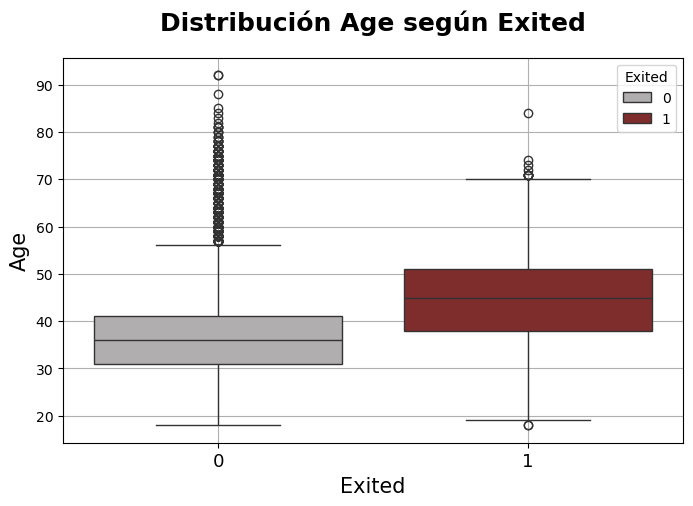

In [44]:
boxplot_edad = boxplot_exited(df=df_clients,
                              ycol='Age',
                              path=IMG_PATH)

In [46]:
df_clients[df_clients['Exited'] == 1]['Age'].describe()

count    1956.000000
mean       44.877301
std         9.807262
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

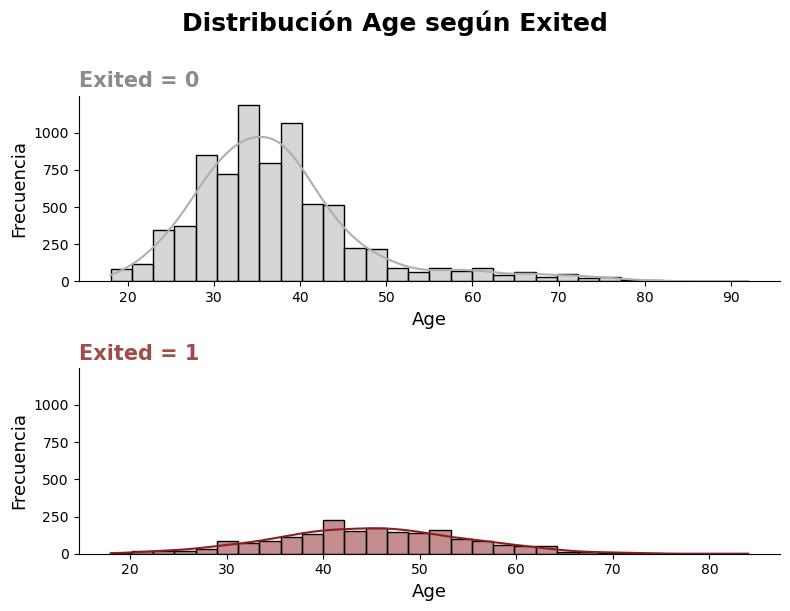

In [58]:
hist_age = histograma_exited(df_clients,
                             xcol='Age',
                             path=IMG_PATH)

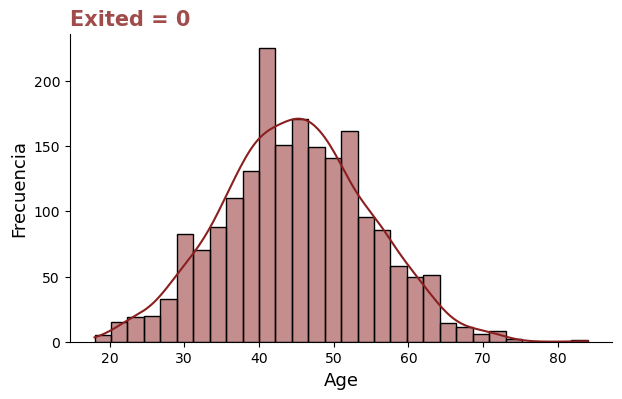

In [57]:
fig, ax = plt.subplots(figsize=(7,4))

sns.histplot(data=df_clients[df_clients['Exited'] == 1], x='Age', bins=30, color=exited_colors[1], kde=True, ax=ax)
ax.set_title("Exited = 0", fontsize=15, fontweight='bold', loc='left', color=BORDO_3)
ax.set_xlabel('Age', fontsize=13)
ax.set_ylabel('Frecuencia', fontsize=13)
sns.despine()
plt.show()

### <font color='#FDD2A9'>**Observaciones: Edad del cliente**</font>

Se observa una clara concentración de clientes que abandonan entre rangos de 40 y 55 años aproximadamente.
Particularmente, el 50% de los clientes que abandonan tienen una edad entre 38 y 51 años. Lo cual resulta crítico ya que es una edad madura pero aun con capacidad crediticia. Por lo que, para una empresa FinTech, este es un segmento de cliente muy valioso.


### <font color='#FCB53B'>**2. Los clientes que abandonan, ¿tienden a ser nuevos o clientes antiguos?**</font>

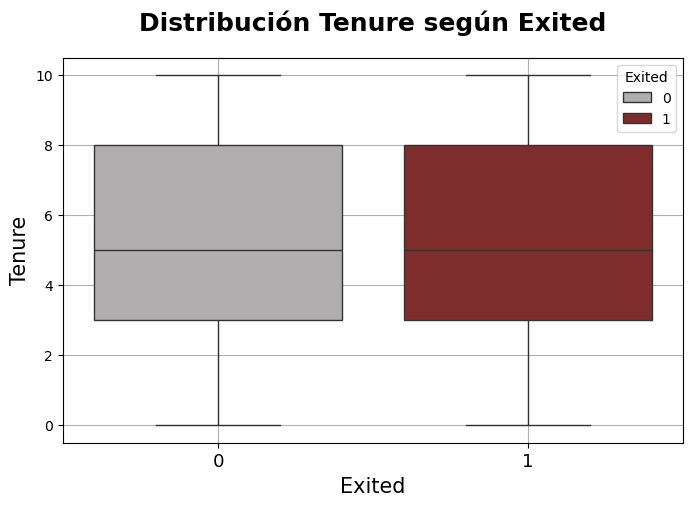

In [47]:
boxplot_edad = boxplot_exited(df=df_clients,
                              ycol='Tenure',
                              path=IMG_PATH)

### <font color='#FDD2A9'>**Observaciones: Antigüedad del cliente**</font>

La distribución de la **angitüedad *(Tenure)*** clientes que abandonan es prácticamente idéntica a la de aquellos que deciden permanecer en la empresa.
Esto a simple vista nos dice que esta característica no es determinante a la hora de predecir el abandono.
Sin embargo, no es lógico que existan las mismas probabilidades de que un cliente de mucha antigüedad abandone que uno nuevo. Esto requerirá un análisis dirigido para entender por qué razón los clientes que deberían ser más fieles se están yendo.

### <font color='#FCB53B'>**3. ¿El género está asociado a mayores niveles de Churn?**</font>

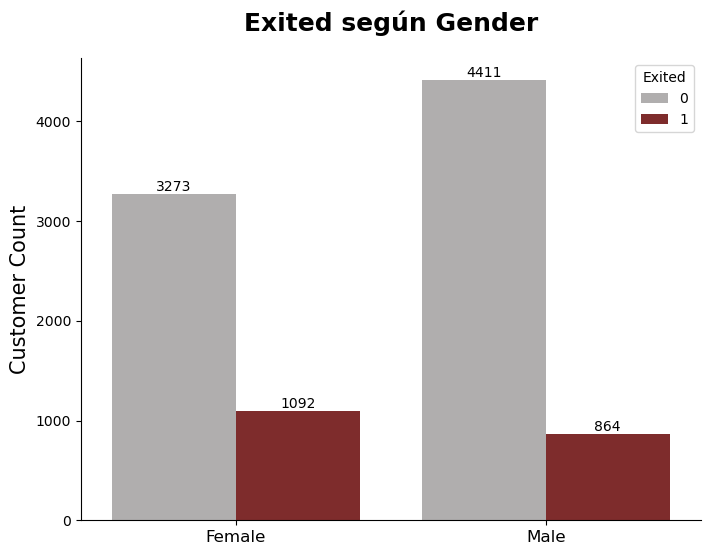

In [59]:
bar_gender = bar_exited(df=df_clients,
                        xcol='Gender',
                        figsize=(8,6),
                        path=IMG_PATH)

In [62]:
gender_counts = pd.DataFrame(df_clients.groupby(['Gender', 'Exited'])['Gender'].value_counts()).reset_index()
gender_counts

,Gender,Exited,count
0,Female,0,3273
1,Female,1,1092
2,Male,0,4411
3,Male,1,864


In [65]:
gender_exit_rate_table = pivot_and_exited_rate(df=gender_counts,
                                              index_col='Gender')
gender_exit_rate_table

,Gender,No Exited,Exited,Exit Rate (%)
0,Female,3273,1092,25.02
1,Male,4411,864,16.38


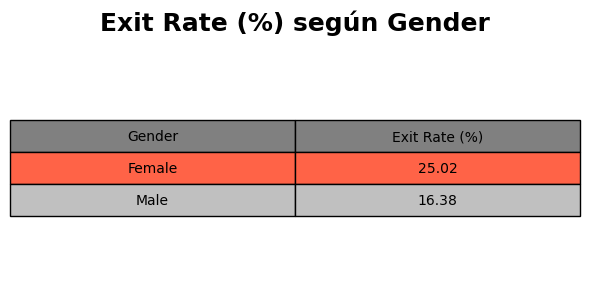

In [66]:
gender_exit_rate_plot = plot_exited_rate_table(df=gender_exit_rate_table,
                                               col='Gender',
                                               path=IMG_PATH)

### <font color='#FDD2A9'>**Observaciones: Género**</font>

La tasa de **abandono en mujeres es aproximádamente 9% mayor que en hombres**.

Si bien esto podría ser una simple casualidad, resulta de suma importancia **realizar un análisis exhaustivo para determinar si no existen sesgos en las oportunidades o condiciones por razones de géneros**.

Especialmente en un contexto cultural con una creciente conciencia en igualdad de género, será **necesario entender** cuáles son las razones por las cuales el **25% de nuestras clientas deciden abandonar** la empresa.

Para ello, se recomienda realizar **análisis de satisfacción a través encuestas, análisis de productos y condiciones ofrecidos, y otros aspectos donde se puedan encontrar sesgos.**

### <font color='#FCB53B'>**4. ¿Está el puntaje crediticio (Credit Score) asociado al abandono de clientes?**</font>

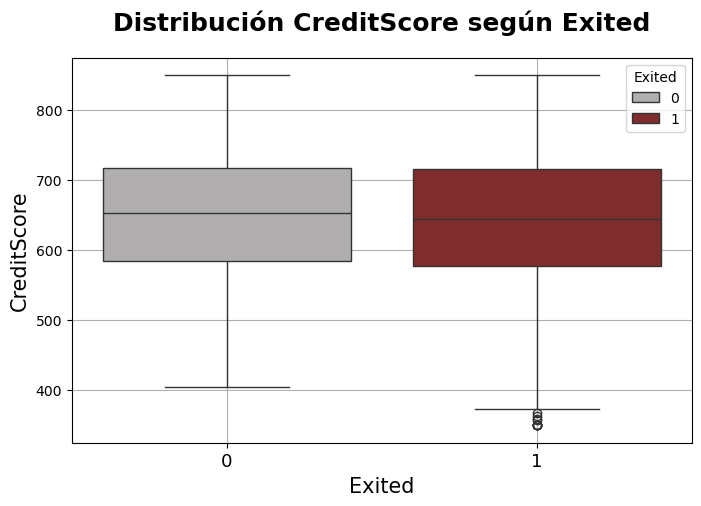

In [67]:
boxplot_edad = boxplot_exited(df=df_clients,
                              ycol='CreditScore',
                              path=IMG_PATH)

### <font color='#FDD2A9'>**Observaciones: CreditScore**</font>

Al igual que con la antigüedad del cliente, la distribución del **puntaje crediticio *(Credit Score)*** es similar en ambos grupos, por lo que este factor no parece ser un determinante para predecir el abandono.

## <font color='#8b1f1f'>**Conclusiones: Perfil del cliente**</font>

A partir de las exploraciones relacionadas al perfil del cliente, se determinó que los factores que parecen relacionarse más al Churn son:

* **Edad**
  > El 50% de clientes que deciden abandonar la empresa se encuentran en un rango de edad entre 38 y 51 años.
  > Este rango etario podría considerarse óptimo para la adquisición de créditos bancarios, por lo cual este fenómeno requerirá un análisis más profundo para entender las razones por las cuales los clientes deciden abandonar la empresa.
  > Una posible hipótesis podría ser que empresas competidoras ofrezcan mejores condiciones crediticias.

* **Género**
  > La tasa de abandono en mujeres es aproximádamente 9% mayor que en hombres.
  > Será necesario entender si existen razones fundadas detrás de esto, ya que podrían existir sesgos en las ofertas o condiciones de los productos de la empresa en cuanto al género. Esto puede ser un área crítica en un contexto cultural cada vez más consciente en asuntos referentes a la igualdad de género.

## <font color='#c37171'>**Geografía e Inflación**</font>

### <font color='#FCB53B'>**5. ¿Algún país presenta un nivel más alto de abandono?**</font>

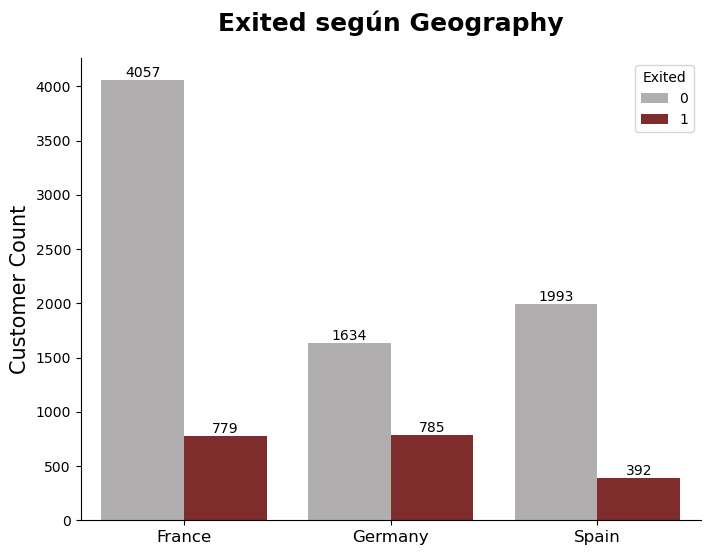

In [70]:
bar_geography = bar_exited(df=df_clients,
                        xcol='Geography',
                        figsize=(8,6),
                        path=IMG_PATH)

In [74]:
geography_counts = pd.DataFrame(df_clients.groupby(['Geography', 'Exited'])['Geography'].value_counts()).reset_index()

In [76]:
geography_exit_rate_table = pivot_and_exited_rate(df=geography_counts,
                                                  index_col='Geography')
geography_exit_rate_table

,Geography,No Exited,Exited,Exit Rate (%)
1,Germany,1634,785,32.45
2,Spain,1993,392,16.44
0,France,4057,779,16.11


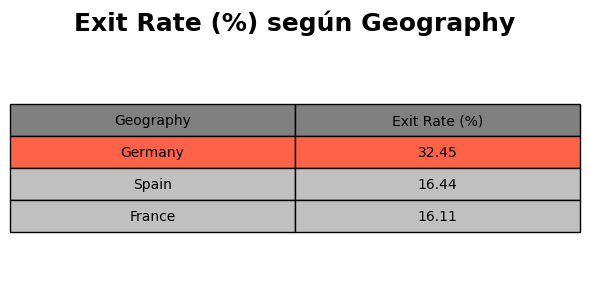

In [77]:
gender_exit_rate_plot = plot_exited_rate_table(df=geography_exit_rate_table,
                                               col='Geography',
                                               path=IMG_PATH)

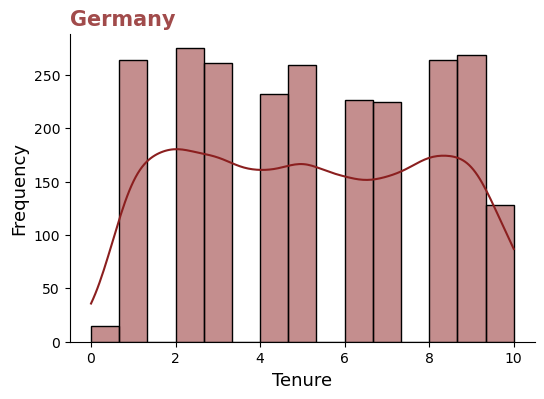

In [82]:
fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(data=df_clients[df_clients['Geography'] == 'Germany'], x='Tenure', bins=15, color=exited_colors[1], kde=True, ax=ax)
ax.set_title("Germany", fontsize=15, fontweight='bold', loc='left', color=BORDO_3)
ax.set_xlabel('Tenure', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)
sns.despine()
plt.show()

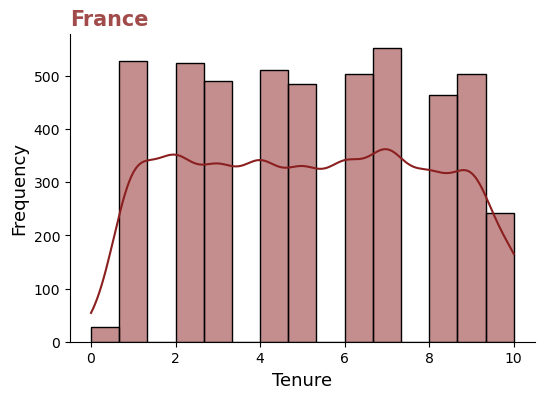

In [83]:
fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(data=df_clients[df_clients['Geography'] == 'France'], x='Tenure', bins=15, color=exited_colors[1], kde=True, ax=ax)
ax.set_title("France", fontsize=15, fontweight='bold', loc='left', color=BORDO_3)
ax.set_xlabel('Tenure', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)
sns.despine()
plt.show()

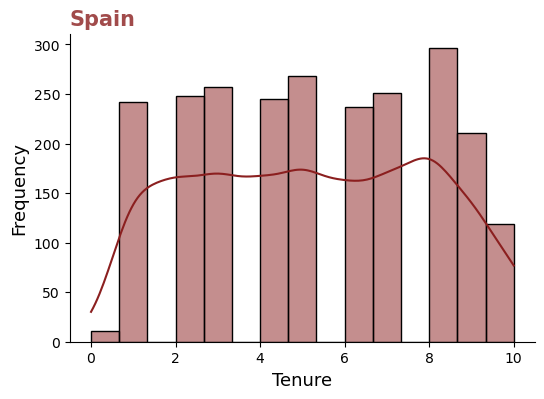

In [84]:
fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(data=df_clients[df_clients['Geography'] == 'Spain'], x='Tenure', bins=15, color=exited_colors[1], kde=True, ax=ax)
ax.set_title("Spain", fontsize=15, fontweight='bold', loc='left', color=BORDO_3)
ax.set_xlabel('Tenure', fontsize=13)
ax.set_ylabel('Frequency', fontsize=13)
sns.despine()
plt.show()

### <font color='#FDD2A9'>**Observaciones: Abandono según País**</font>

Como es posible observar en el gráfico y tabla presentados al inicio de esta sección, **Alemania *(Germany)*** preseta una **tasa de abandono dos veces mayor** que la de los otros dos países donde opera la empresa.

Esto señala un claro descontento por los clientes de dicho país. Para entender un poco más este fenómeno, se investigó si este era un mercado nuevo, quizás en etapas aún experimentales, dado que la cantidad total de clientes en relación a **Francia *(France)*** es bastante menor, pero se observó que **la distribución de la antigüedad de los clientes es similar en todos los países**, lo cual sugiere que **el descontento no es algo reciente, sino más bien un factor constante.**

Esto podría estar relacionado a **factores culturales**, **políticas de la empresa dentro de las regulaciones del país**, u **otro tipo de factores** que requerirán un análisis enfocado sólo en **aspectos del mercado Alemán**.

### <font color='#FCB53B'>**6. ¿Está relacionado el abandono con la inflación del país?**</font>

In [85]:
churners = df_clients[df_clients['Exited'] == 1]

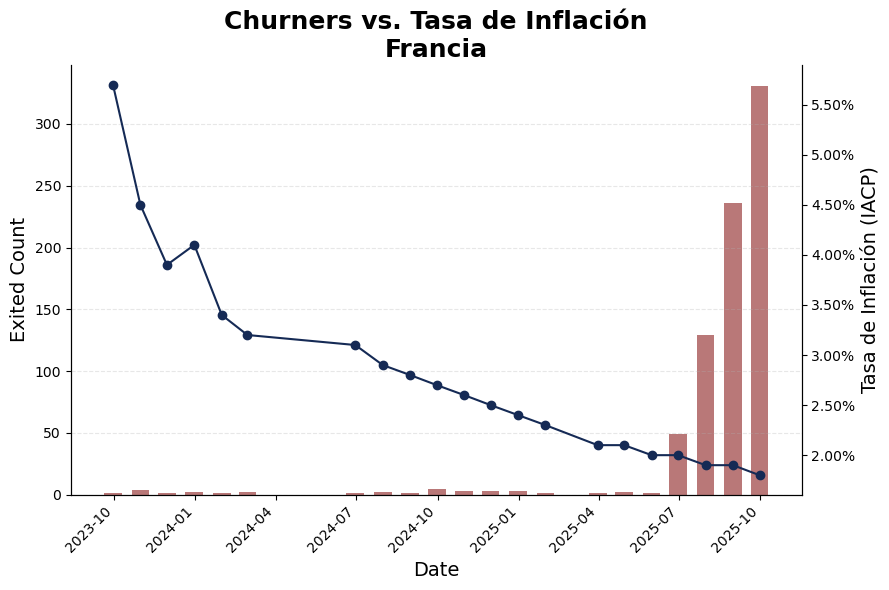

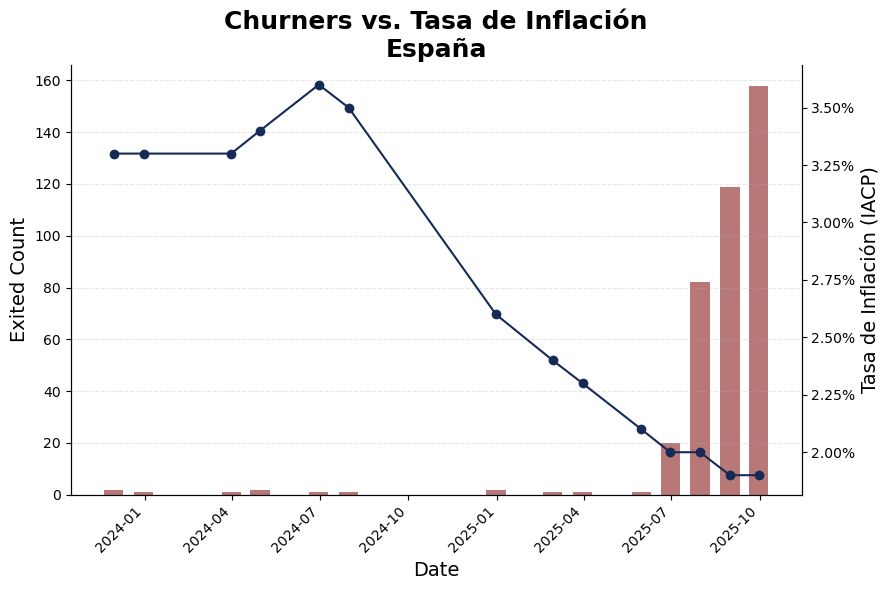

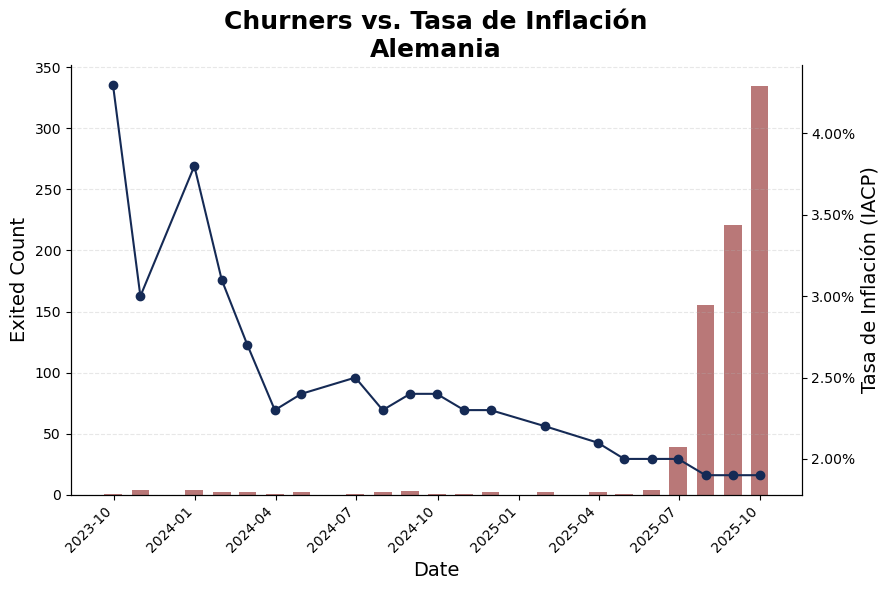

In [91]:
import matplotlib.dates as mdates

for country in df_clients['Geography'].unique():

    country_churners = churners[churners['Geography'] == country]
    cids = country_churners['CustomerId'].unique()
    country_inflation = df_inflation[df_inflation['Geography'] == country]
    country_inflation['month_year'] = country_inflation['month_date'].dt.to_period('M')
    country_churners['month_year'] = country_churners['ExitDate'].dt.to_period('M')
    country_churners = country_churners.merge(country_inflation, on='month_year')
    country_churners_counts = pd.DataFrame(country_churners.groupby(['month_date', 'inflation_rate'])['Exited'].sum()).reset_index()

    fig, ax1 = plt.subplots(figsize=(9, 6))

    color_volume = exited_colors[1]  
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Exited Count', fontsize=14)
    # Graficar barras
    ax1.bar(country_churners_counts['month_date'], country_churners_counts['Exited'], color=color_volume, alpha=0.6, width=20)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Formatear eje X para mostrar solo año y fecha
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45, ha='right')
    
    # Axis secundaria para la inflación
    ax2 = ax1.twinx()  
    color_inflation = AZUL_2
    ax2.set_ylabel('Tasa de Inflación (IACP)', fontsize=14)
    # Graficar la tasa de inflación
    ax2.plot(country_churners_counts['month_date'], country_churners_counts['inflation_rate'], color=color_inflation, marker='o', linestyle='-')
    ax2.tick_params(axis='y')
    
    # Formatear axis secundario a porcentajes
    ax2.yaxis.set_major_formatter(plt.FuncFormatter('{:.2%}'.format))
    
    if country == 'Germany':
         plt.title(f'Churners vs. Tasa de Inflación\nAlemania', fontsize=18, fontweight='bold')
    elif country == 'France':
        plt.title(f'Churners vs. Tasa de Inflación\nFrancia', fontsize=18, fontweight='bold')
    else:
        plt.title(f'Churners vs. Tasa de Inflación\nEspaña', fontsize=18, fontweight='bold')
        
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    fig.tight_layout()
    plt.savefig(IMG_PATH/f'{country}_churn_inflation_doble_axis.png', dpi=300)
    plt.show() 

### <font color='#FDD2A9'>**Observaciones: Influencia de la inflación del país en el abandono**</font>

## <font color='#8b1f1f'>**Conclusiones: Geografía e Inflación**</font>

## <font color='#c37171'>**Transacciones del cliente**</font>

### <font color='#FCB53B'>**7. Los clientes que abandonan, ¿presentan algún comportamiento similar en el volumen de transacciones antes de irse?**</font>

### <font color='#FCB53B'>**8. ¿Difieren los montos de las transacciones de acuerdo a la condición de abandono?**</font>

### <font color='#FCB53B'>**9. ¿Difiere el volumen de transacciones de acuerdo a la condición de abandono?**</font>

## <font color='#8b1f1f'>**Conclusiones: Transacciones del cliente**</font>

## <font color='#c37171'>**Interacciones del cliente con la App**</font>

### <font color='#FCB53B'>**10. Los clientes que abandonan, ¿muestran algún patrón particular en la frecuencia de inicio de sesiones?**</font>

### <font color='#FCB53B'>**11. Los clientes que abandonan, ¿cuentan con mayor cantidad de inicios de sesión fallidos?**</font>

### <font color='#FCB53B'>**12. La cantidad de tiempo que un cliente utiliza la app, ¿es un factor asociado al abanodno?**</font>

## <font color='#8b1f1f'>**Conclusiones: Interacciones del cliente con la App**</font>